## Loading the data

In [1]:
import pandas as pd

In [64]:
data = pd.read_csv("Flight_2x.csv",index_col=0) #load synthetic data

In [60]:
realdf = pd.read_csv("main_flight.csv") #load real data

In [30]:
data

,altitude,groundspeed,latitude,longitude,distance,flight_id
0,18376.718750,362.351135,47.752060,7.811829,38.879387,A_01
1,19038.230470,374.175323,47.675587,7.679071,39.135857,A_01
2,18989.634770,380.198700,47.544983,7.646380,38.707714,A_01
3,18621.933590,379.547119,47.461300,7.645119,38.300434,A_01
4,18518.861330,375.330353,47.425331,7.651060,37.983433,A_01
...,...,...,...,...,...,...
195,2471.157959,148.680893,47.416683,8.570174,3.109124,A_01
196,2452.703125,148.225326,47.418480,8.570197,3.029280,A_01
197,2435.296387,147.551590,47.418484,8.571409,3.010904,A_01
198,2419.950195,147.071777,47.419243,8.570423,2.981690,A_01


In [56]:
data = pd.read_csv('Flight_2x.csv', index_col=0,nrows=200)

In [52]:
data

,timestamp,altitude,callsign,geoaltitude,groundspeed,icao24,lastseen,latitude,longitude,onground,...,flight_id,runway,initial_bearing,initial_flow,simple,track_unwrapped,x,y,timedelta,distance_difference
0,2019-10-19 06:12:14+0000,17850.0,AAL92,18175.0,355.174298,a3d3a5,2019-10-19 06:31:58+0000,47.611115,7.593102,False,...,AAL92_016,34,102.406572,90-132,True,109.251946,394261.4293,5274140.009,0,0.000000
1,2019-10-19 06:12:20+0000,17625.0,AAL92,17875.0,353.570055,a3d3a5,2019-10-19 06:31:58+0000,47.607903,7.606835,False,...,AAL92_016,34,102.406572,90-132,True,109.152390,395287.1263,5273764.388,6,0.585858
2,2019-10-19 06:12:25+0000,17500.0,AAL92,17825.0,349.756756,a3d3a5,2019-10-19 06:31:58+0000,47.605362,7.617645,False,...,AAL92_016,34,102.406572,90-132,True,108.849378,396094.5989,5273467.449,11,0.461279
3,2019-10-19 06:12:31+0000,17325.0,AAL92,17650.0,343.432375,a3d3a5,2019-10-19 06:31:58+0000,47.602158,7.631516,False,...,AAL92_016,34,102.406572,90-132,True,108.857010,397130.8618,5273092.834,17,0.591067
4,2019-10-19 06:12:37+0000,17200.0,AAL92,17500.0,338.089933,a3d3a5,2019-10-19 06:31:58+0000,47.599045,7.644905,False,...,AAL92_016,34,102.406572,90-132,True,109.290046,398131.2985,5272729.212,23,0.570752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2019-10-19 06:30:31+0000,1900.0,AAL92,2050.0,143.178087,a3d3a5,2019-10-19 06:31:58+0000,47.431458,8.566383,False,...,AAL92_016,34,102.406572,90-132,True,-24.943905,467298.8507,5253305.022,1097,0.192886
196,2019-10-19 06:30:37+0000,1800.0,AAL92,1950.0,141.364654,a3d3a5,2019-10-19 06:31:58+0000,47.434982,8.563980,False,...,AAL92_016,34,102.406572,90-132,True,-25.114835,467119.8051,5253697.773,1103,0.231947
197,2019-10-19 06:30:43+0000,1725.0,AAL92,1875.0,139.556320,a3d3a5,2019-10-19 06:31:58+0000,47.438644,8.561440,False,...,AAL92_016,34,102.406572,90-132,True,-25.463345,466930.5146,5254105.851,1109,0.241165
198,2019-10-19 06:30:48+0000,1650.0,AAL92,1775.0,139.556320,a3d3a5,2019-10-19 06:31:58+0000,47.441391,8.559517,False,...,AAL92_016,34,102.406572,90-132,True,-25.463345,466787.2699,5254411.921,1114,0.180680


## Plotting the distance between two points for a flight 

In [55]:
data['distance_difference'] = data['distance'].diff().shift(-1)

# If you want to replace NaN values in the first row with 0
data['distance_difference'] = data['distance_difference'].fillna(0)

In [57]:
# Calculate the differences manually in reverse order
data['distance_difference'] = data['distance'].shift(1) - data['distance']

# Replace NaN values in the first row with 0
data['distance_difference'].iloc[0] = 0

C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\225267674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_difference'].iloc[0] = 0


In [58]:
data

,altitude,groundspeed,latitude,longitude,distance,flight_id,distance_difference
0,18376.718750,362.351135,47.752060,7.811829,38.879387,A_01,0.000000
1,19038.230470,374.175323,47.675587,7.679071,39.135857,A_01,-0.256470
2,18989.634770,380.198700,47.544983,7.646380,38.707714,A_01,0.428143
3,18621.933590,379.547119,47.461300,7.645119,38.300434,A_01,0.407280
4,18518.861330,375.330353,47.425331,7.651060,37.983433,A_01,0.317001
...,...,...,...,...,...,...,...
195,2471.157959,148.680893,47.416683,8.570174,3.109124,A_01,0.095661
196,2452.703125,148.225326,47.418480,8.570197,3.029280,A_01,0.079845
197,2435.296387,147.551590,47.418484,8.571409,3.010904,A_01,0.018376
198,2419.950195,147.071777,47.419243,8.570423,2.981690,A_01,0.029213


In [41]:
from matplotlib import pyplot as plt
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a)) 
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
    dis = c*r
    if dis > 4:
        dis = 0
    # calculate the result
    return dis
     
     
# Assuming df is your DataFrame with columns 'latitude' and 'longitude'
distances=[]
for i in range((200) - 1):
    lat1 = data.at[i, 'latitude']
    lon1 = data.at[i, 'longitude']
    lat2 = data.at[i + 1, 'latitude']
    lon2 = data.at[i + 1, 'longitude']
    #print(f"Distance between ({lat1}, {lon1}) and ({lat2}, {lon2}): {distance(lat1, lat2, lon1, lon2)} km")
    distances.append(distance(lat1, lat2, lon1, lon2))

# Create DataFrame with distances
distances_df = pd.DataFrame({'distances': distances})

# Plot histogram
#plt.hist(distances_df['distances'], bins=100, color='blue', edgecolor='black')
#plt.xlabel('Distance (km)')
#plt.ylabel('Frequency')
#plt.title('Histogram of Synthetic data Distances')
#plt.show()

In [42]:
distances_df

,distances
0,1.089691
1,0.858280
2,1.099250
3,1.061919
4,0.819956
...,...
194,0.358553
195,0.431616
196,0.449813
197,0.337906


In [68]:
flights_data=realdf
flights_data1 = data.head(350 * 200)

In [125]:
import pandas as pd

# Assuming you have a DataFrame called 'flights_data' containing data for all flights
# Each flight has 200 rows

# List to store total distances for each flight
total_distances = []

for i in range(0, len(flights_data), 200):
    # Get the data for the current flight
    flight_data = flights_data.iloc[i:i+200]
    
    # Calculate the differences for each flight
    flight_data['distance_difference'] = flight_data['distance'].shift(1) - flight_data['distance']
    flight_data['distance_difference'].iloc[0] = 0
    
    # Sum up the differences for each flight
    total_distance = flight_data['distance_difference'].sum()
    total_distances.append(total_distance)

# Create a DataFrame for total distances
total_distances_df1 = pd.DataFrame({'total_distance': total_distances})

C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['distance_difference'] = flight_data['distance'].shift(1) - flight_data['distance']
C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['distance_difference'].iloc[0] = 0
C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['distance_difference'] = flight_data['distance'].shift(1) - flight_data['distance']
C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['distance_difference'].iloc[0] = 0
C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['distance_difference'] = flight_data['distance'].shift(1) - flight_data['distance']
C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['distance_difference'].iloc[0] = 0
C:\Users\jamma\AppData\Local\Temp\ipykernel_28688\1762230545.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [127]:
total_distances_df1

,total_distance
0,38.622490
1,38.602107
2,38.649204
3,38.556533
4,38.592101
...,...
345,38.573006
346,38.677678
347,38.589490
348,38.607978


In [128]:
flight_data

,timestamp,altitude,callsign,geoaltitude,groundspeed,icao24,lastseen,latitude,longitude,onground,...,flight_id,runway,initial_bearing,initial_flow,simple,track_unwrapped,x,y,timedelta,distance_difference
69800,2019-11-30 06:53:49+0000,18150.0,EWG2T,18250.0,379.806202,3c56f3,2019-11-30 07:10:56+0000,48.126434,8.612732,False,...,EWG2T_4861,34,183.73229,162-216,True,185.590508,471180.8635,5330529.853,0,0.000000
69801,2019-11-30 06:53:54+0000,18050.0,EWG2T,18150.0,378.810971,3c56f3,2019-11-30 07:10:56+0000,48.117743,8.611450,False,...,EWG2T_4861,34,183.73229,162-216,True,185.605243,471080.6032,5329564.280,5,0.524061
69802,2019-11-30 06:53:59+0000,17925.0,EWG2T,18025.0,377.815766,3c56f3,2019-11-30 07:10:56+0000,48.109038,8.610183,False,...,EWG2T_4861,34,183.73229,162-216,True,185.620055,470981.3521,5328597.152,10,0.524853
69803,2019-11-30 06:54:04+0000,17800.0,EWG2T,17925.0,376.820587,3c56f3,2019-11-30 07:10:56+0000,48.100021,8.608887,False,...,EWG2T_4861,34,183.73229,162-216,True,185.634945,470879.7967,5327595.457,15,0.543558
69804,2019-11-30 06:54:08+0000,17700.0,EWG2T,17825.0,375.825433,3c56f3,2019-11-30 07:10:56+0000,48.093117,8.607859,False,...,EWG2T_4861,34,183.73229,162-216,True,185.649914,470799.3326,5326828.405,19,0.416326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2019-11-30 07:09:38+0000,1550.0,EWG2T,1975.0,140.943129,3c56f3,2019-11-30 07:10:56+0000,47.433704,8.564899,False,...,EWG2T_4861,34,183.73229,162-216,True,335.253252,467188.3160,5253555.366,949,0.193653
69996,2019-11-30 07:09:42+0000,1500.0,EWG2T,1950.0,140.035589,3c56f3,2019-11-30 07:10:56+0000,47.436035,8.563293,False,...,EWG2T_4861,34,183.73229,162-216,True,335.081977,467068.6822,5253815.076,953,0.153509
69997,2019-11-30 07:09:47+0000,1425.0,EWG2T,1850.0,139.129316,3c56f3,2019-11-30 07:10:56+0000,47.438872,8.561307,False,...,EWG2T_4861,34,183.73229,162-216,True,334.908470,466920.7001,5254131.172,958,0.186980
69998,2019-11-30 07:09:52+0000,1350.0,EWG2T,1775.0,139.129316,3c56f3,2019-11-30 07:10:56+0000,47.441758,8.559336,False,...,EWG2T_4861,34,183.73229,162-216,True,334.908470,466773.8275,5254452.785,963,0.189269


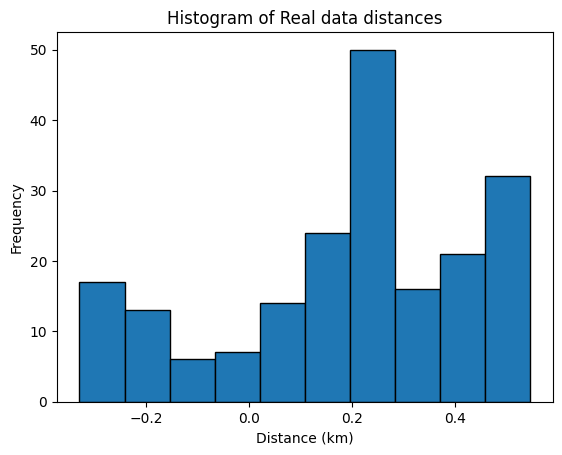

In [126]:
plt.hist(flight_data['distance_difference'], bins=10, edgecolor='black')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Real data distances')
plt.show()

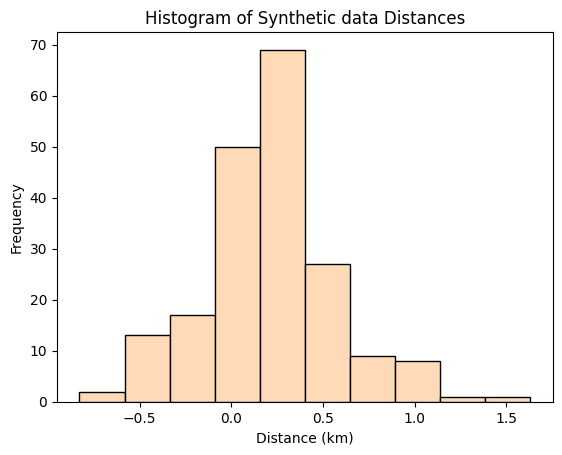

In [124]:
plt.hist(flight_data['distance_difference'], bins=10, color='#FFDAB9', edgecolor='black')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Synthetic data Distances')
plt.show()

In [120]:
flight_data = flight_data[flight_data['distance_difference'] > -1]

In [71]:
total_distances_df

,total_distance
0,38.622490
1,38.602107
2,38.649204
3,38.556533
4,38.592101
...,...
345,38.573006
346,38.677678
347,38.589490
348,38.607978


In [73]:
total_distances_df1

,total_distance
0,35.936824
1,36.065372
2,36.101040
3,36.392474
4,35.985722
...,...
345,36.268496
346,35.709474
347,36.055150
348,36.266975


In [74]:
originalDataATDs = total_distances_df

In [75]:
syntheticDataATDs = total_distances_df1

In [87]:
syntheticDataATDs
syntheticDataATDs = syntheticDataATDs[syntheticDataATDs['total_distance'] >= 34]

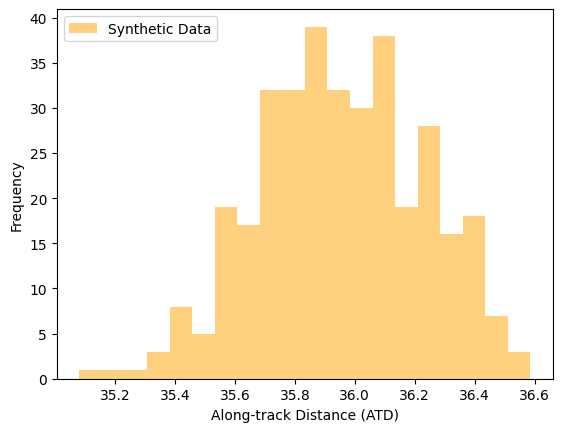

In [88]:
#plt.hist(originalDataATDs, bins=20, alpha=0.5, label='Historic Data')

# Plot histogram of ATD for synthetic GAN track data
plt.hist(syntheticDataATDs, bins=20, alpha=0.5,color='orange', label='Synthetic Data')

plt.xlabel('Along-track Distance (ATD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


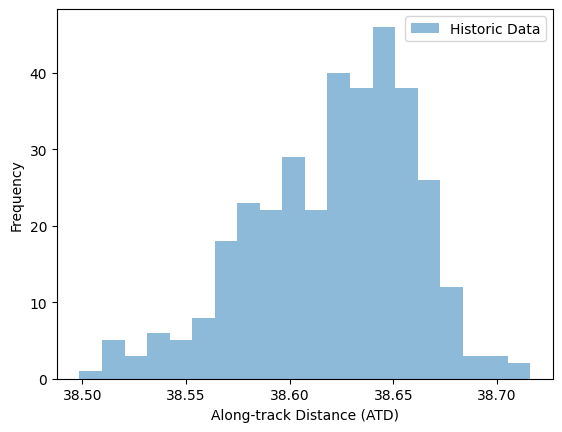

In [90]:
plt.hist(originalDataATDs, bins=20, alpha=0.5, label='Historic Data')

# Plot histogram of ATD for synthetic GAN track data
#plt.hist(syntheticDataATDs, bins=20, alpha=0.5, label='Synthetic Data')

plt.xlabel('Along-track Distance (ATD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


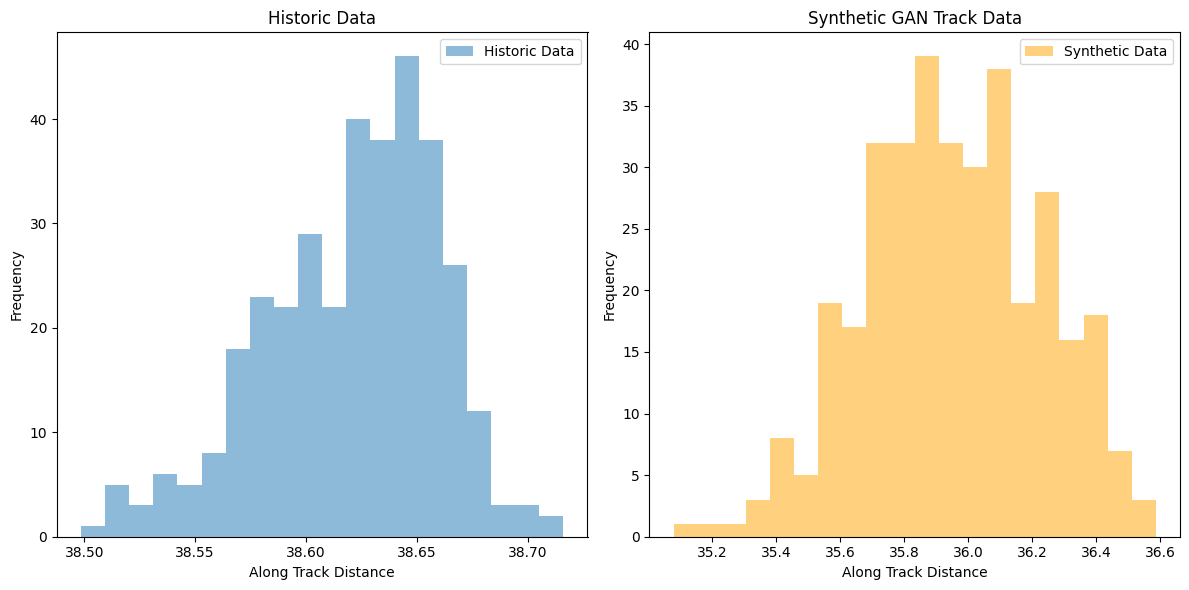

In [95]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of ATD for historic data
axs[0].hist(originalDataATDs, bins=20, alpha=0.5, label='Historic Data')
axs[0].set_title('Historic Data')
axs[0].set_xlabel('Along Track Distance')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot histogram of ATD for synthetic GAN track data
axs[1].hist(syntheticDataATDs, bins=20, alpha=0.5,color='orange', label='Synthetic Data')
axs[1].set_title('Synthetic GAN Track Data')
axs[1].set_xlabel('Along Track Distance')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()


## Kolmogorov-Smirnov Test

In [93]:
statistic, p_value = ks_2samp(originalDataATDs['total_distance'],syntheticDataATDs['total_distance'])
print("Kolmogorov-Smirnov Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 2.5224762749148815e-209


In [92]:
ks_2samp(originalDataATDs['total_distance'],syntheticDataATDs['total_distance'])

KstestResult(statistic=1.0, pvalue=2.5224762749148815e-209, statistic_location=36.58615136, statistic_sign=-1)